<a href="https://colab.research.google.com/github/tallurikishore1/649/blob/main/13_02_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv(r'/content/drive/MyDrive/datasets/Wholesale customers data.csv')

In [4]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [5]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [6]:
array=df.values

In [7]:
array

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

In [8]:
stscaler = MinMaxScaler(feature_range=(0, 1))
x= stscaler.fit_transform(array)

In [9]:
x

array([[0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
        0.02784731],
       [0.06289903, 0.13282409, 0.10309667, 0.02854842, 0.08058985,
        0.03698373],
       [0.05662161, 0.11918086, 0.08278992, 0.03911643, 0.08605232,
        0.16355861],
       ...,
       [0.1295431 , 0.21013575, 0.32594285, 0.00677142, 0.36346267,
        0.03888194],
       [0.091727  , 0.02622442, 0.02402535, 0.01664914, 0.00404174,
        0.04426366],
       [0.02482434, 0.02237109, 0.02702178, 0.00065742, 0.01161082,
        0.00102211]])

In [10]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(x)

DBSCAN(eps=0.8, min_samples=6)

In [11]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [12]:
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])

<ipython-input-15-226a76f2c565>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df["Fresh"], df["Milk"], df["Grocery"], cmap="tab10", alpha=0.7)


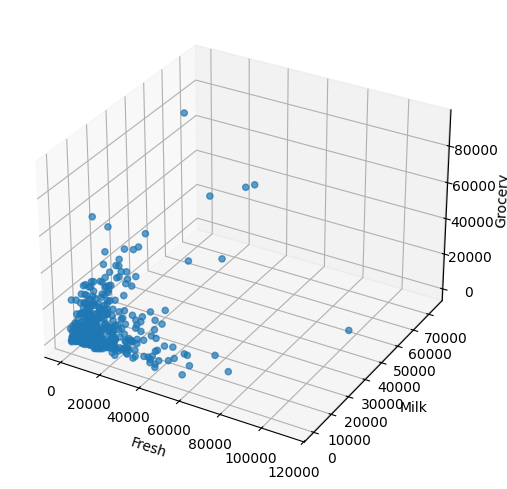

In [15]:
db=pd.DataFrame(dbscan.labels_,columns=['cluster'])
pd.concat([df,cl],axis=1)

fig =  plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

#Select 3 features to plt
ax.scatter(df["Fresh"], df["Milk"], df["Grocery"], cmap="tab10", alpha=0.7)
ax.set_xlabel("Fresh")
ax.set_ylabel("Milk")
ax.set_zlabel("Grocery")
plt.show()